# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 2384 Кочуров Александр Дмитриевич и Чепасов Дмитрий Витальевич. Вариант №18.

## Цель работы

Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Дискретный сигнал (или последовательность) $s(k)$ — это функция, заданная на дискретном множестве целочисленных аргументов $k$, где $k$ представляет собой номер отсчета или дискретное нормированное время.

Единичный цифровой импульс (дельта-функция Кронекера):
Эта последовательность равна единице при $k=0$ и нулю при всех остальных значениях $k$. Математически она описывается как:
$$
\delta_d(k) = \begin{cases} 1, & k = 0 \\ 0, & k \neq 0 \end{cases}
$$

Дискретный единичный скачок (функция Хевисайда):
Эта последовательность равна нулю для отрицательных $k$ и единице для неотрицательных $k$. Формула имеет вид:
$$
\sigma_d(k) = \begin{cases} 1, & k \ge 0 \\ 0, & k < 0 \end{cases}
$$
Дискретный скачок и импульс связаны соотношением: $\delta_d(k) = \sigma_d(k) - \sigma_d(k-1)$.

Дискретная экспоненциальная функция:
Описывается выражением:
$$ s_1(k) = \begin{cases} a^k, & k \geq 0 \\ 0, & k < 0 \end{cases}, k \in \mathbb{Z} $$
где $a$ — основание экспоненты. Поведение последовательности зависит от значения $a$:
*   Если $|a| < 1$, последовательность является затухающей.
*   Если $|a| > 1$, последовательность является нарастающей.
*   Если $a < 0$, последовательность является знакопеременной (осциллирующей).

Дискретный комплексный гармонический сигнал:
Это фундаментальный сигнал в цифровой обработке, описываемый формулой:
$$
s_2(k) = C e^{j \hat{\omega}_0 k}
$$
где $C$ — комплексная амплитуда, $j$ — мнимая единица, а $\hat{\omega}_0$ — дискретная (цифровая) нормированная частота в радианах.
С помощью формулы Эйлера $e^{j\phi} = \cos(\phi) + j\sin(\phi)$ этот сигнал можно разложить на вещественную и мнимую части:
$$
s_2(k) = C (\cos(\hat{\omega}_0 k) + j\sin(\hat{\omega}_0 k))
$$

Операция задержки:
Задержка дискретного сигнала $s(k)$ на $m$ отсчетов ($m > 0$) означает сдвиг всей последовательности вправо по временной оси. Математически это соответствует замене аргумента $k$ на $(k-m)$. Для задержанного сигнала $s_z(k)$ получаем:
$$
s_z(k) = s(k-m)
$$

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

*   Длина последовательности $N = 33$
*   Период дискретизации $T = 0.0005$ c
*   Основание экспоненты $a = 0.89$
*   Амплитуда гармоники $C = 4$
*   Цифровая частота $\hat{\omega}_0 = \pi/9$ рад
*   Задержка $m = 8$

## Выполнение работы

Параметры варианта №18

In [19]:
import numpy as np
import matplotlib.pyplot as plt

N_br = 18
N = 30 + N_br % 5
T = 0.0005 * (1 + N_br % 3)
a = (-1)**N_br * (0.8 + 0.005 * (N_br % 20))
C = 1 + N_br % 5
w0_hat = np.pi / (6 + N_br % 5)
m = 5 + N_br % 5

# --- Общие настройки для графиков ---
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Векторы времени
n = np.arange(N)  # Дискретное нормированное время (индексы) 0, 1, ..., N-1
t = n * T         # Дискретное время (физическое)

N_br, N, T, a, C, w0_hat, m

(18, 33, 0.0005, 0.89, 4, 0.3490658503988659, 8)

### 1. Единичный цифровой импульс $\delta_d(k)$

Был смоделирован единичный цифровой импульс. На рисунке 1 показаны графики сигнала в зависимости от дискретного времени $nT$ и дискретного нормированного времени $n$.

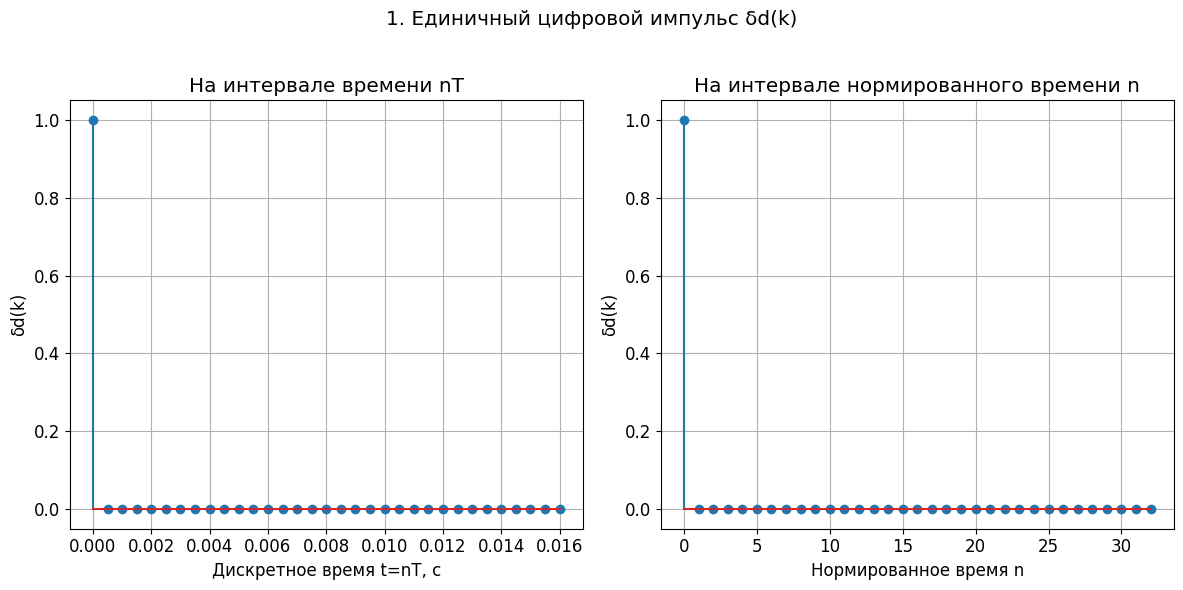

In [20]:
# --- 1. Единичный цифровой импульс ---
delta_d = np.zeros(N)
delta_d[0] = 1

fig1, (ax1, ax2) = plt.subplots(1, 2)
fig1.suptitle('1. Единичный цифровой импульс δd(k)')

# График на интервале дискретного времени
ax1.stem(t, delta_d)
ax1.set_xlabel('Дискретное время t=nT, c')
ax1.set_ylabel('δd(k)')
ax1.set_title('На интервале времени nT')
ax1.grid(True)

# График на интервале дискретного нормированного времени
ax2.stem(n, delta_d)
ax2.set_xlabel('Нормированное время n')
ax2.set_ylabel('δd(k)')
ax2.set_title('На интервале нормированного времени n')
ax2.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('fig1_delta.png')
#plt.show()

*   Взаимосвязь между дискретным и дискретным нормированным временем. Дискретное нормированное время $n$ — это безразмерный индекс (номер) отсчета в последовательности, принимающий целые значения: $n = 0, 1, 2, ..., N-1$. Дискретное время $t = nT$ — это физическое время, в которое был взят $n$-й отсчет. Оно получается умножением номера отсчета $n$ на период дискретизации $T$. Таким образом, ось нормированного времени показывает только номера отсчетов, а ось дискретного времени — реальные временные моменты.
*   Различие между единичным цифровым импульсом и дельта-функцией. Единичный цифровой импульс $\delta_d(k)$ (или дельта-функция Кронекера) — это дискретная последовательность, которая имеет конечное значение (1) в одной точке ($k=0$) и ноль в остальных. Дельта-функция Дирака $\delta(t)$ — это непрерывная обобщенная функция, которая в точке $t=0$ равна бесконечности, а в остальных — нулю, при этом её интеграл по всей оси равен 1. Цифровой импульс является дискретным аналогом функции Дирака, но обладает конечной амплитудой.

### 2. Дискретный единичный скачок $\sigma_d(k)$

Была смоделирована последовательность единичного скачка. На рисунке 2 показаны графики сигнала на двух временных шкалах.

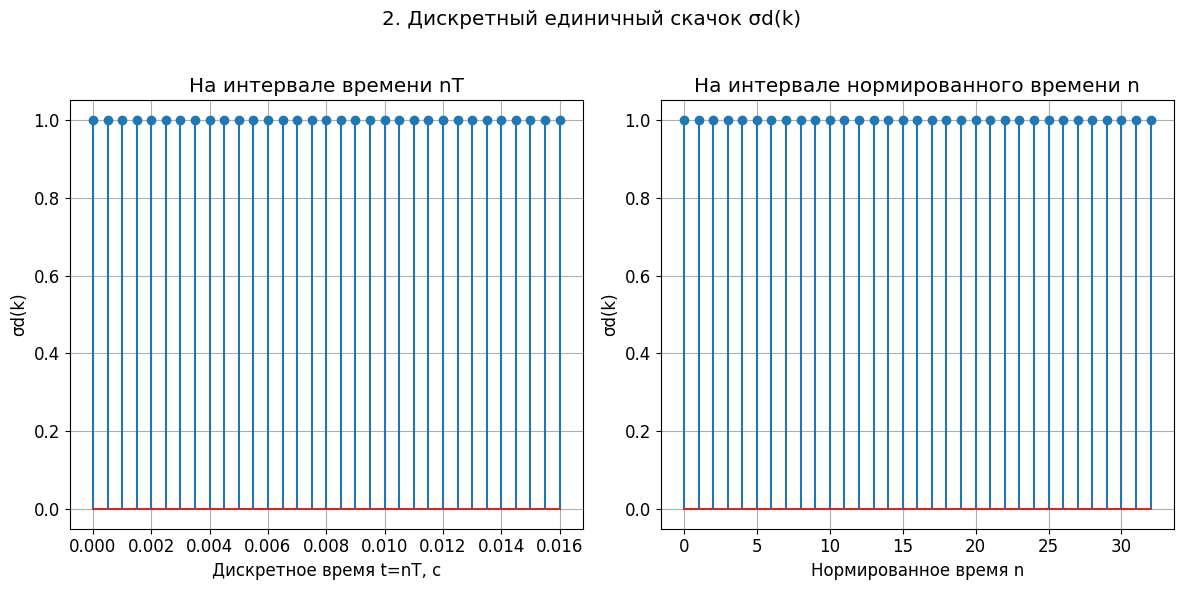

In [21]:
# --- 2. Дискретный единичный скачок ---
sigma_d = np.ones(N) # Поскольку n начинается с 0, это эквивалентно (n >= 0)

fig2, (ax1, ax2) = plt.subplots(1, 2)
fig2.suptitle('2. Дискретный единичный скачок σd(k)')

# График на интервале дискретного времени
ax1.stem(t, sigma_d)
ax1.set_xlabel('Дискретное время t=nT, c')
ax1.set_ylabel('σd(k)')
ax1.set_title('На интервале времени nT')
ax1.grid(True)

# График на интервале дискретного нормированного времени
ax2.stem(n, sigma_d)
ax2.set_xlabel('Нормированное время n')
ax2.set_ylabel('σd(k)')
ax2.set_title('На интервале нормированного времени n')
ax2.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('fig2_sigma.png')
#plt.show()

*   Соответствие между дискретным и аналоговым единичными скачками. Дискретный единичный скачок $\sigma_d(k)$ является результатом дискретизации (сэмплирования) аналоговой функции единичного скачка $\sigma(t)$. Значение дискретного сигнала в момент $k$ равно значению аналогового сигнала в момент времени $t=kT$: $\sigma_d(k) = \sigma(kT)$.

*   Чему равна частота дискретизации дискретного единичного скачка. Сам по себе единичный скачок является апериодическим сигналом и не имеет собственной частоты. Однако он был получен в системе с определенной частотой дискретизации. Частота дискретизации $f_s$ — это величина, обратная периоду дискретизации $T$.
$$f_s = 1 / T = 1 / 0.0005 = 2000 Гц.$$

### 3. Дискретная экспоненциальная функция $s_1(k)$

Смоделирована дискретная экспоненциальная функция $s_1(k) = a^k$ с основанием $a=0.89$. Поскольку $|a| < 1$, экспонента является затухающей.

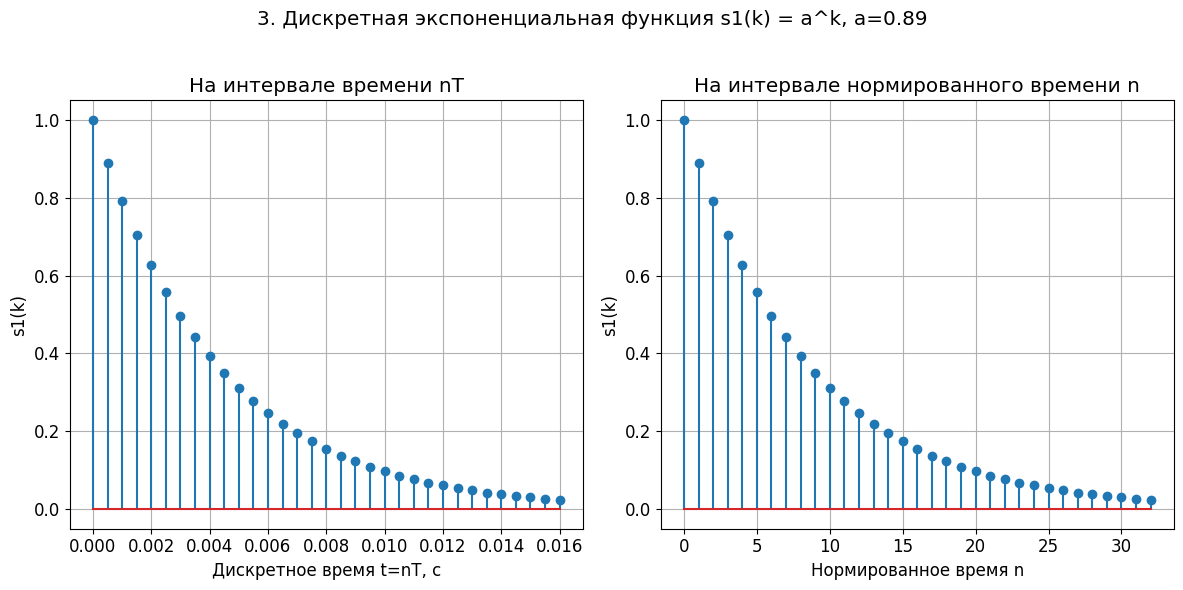

In [22]:
# --- 3. Дискретная экспоненциальная функция ---
s1 = a**n

fig3, (ax1, ax2) = plt.subplots(1, 2)
fig3.suptitle(f'3. Дискретная экспоненциальная функция s1(k) = a^k, a={a:.2f}')

# График на интервале дискретного времени
ax1.stem(t, s1)
ax1.set_xlabel('Дискретное время t=nT, c')
ax1.set_ylabel('s1(k)')
ax1.set_title('На интервале времени nT')
ax1.grid(True)

# График на интервале дискретного нормированного времени
ax2.stem(n, s1)
ax2.set_xlabel('Нормированное время n')
ax2.set_ylabel('s1(k)')
ax2.set_title('На интервале нормированного времени n')
ax2.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('fig3_exp.png')
#plt.show()

*   Соответствие между дискретной и аналоговой экспонентами. Дискретная экспонента $s_d(k) = a^k$ может быть получена путем дискретизации аналоговой экспоненты вида $s(t) = e^{-\alpha t}$ ($\alpha > 0$). При дискретизации: $s_d(k) = s(kT) = e^{-\alpha kT} = (e^{-\alpha T})^k$. Таким образом, основание дискретной экспоненты $a$ связано с параметром аналоговой экспоненты $\alpha$ и периодом дискретизации $T$ соотношением $a = e^{-\alpha T}$.

### 4. Дискретный комплексный гармонический сигнал $s_2(k)$

Смоделирован комплексный гармонический сигнал $s_2(k) = C \exp(j \hat{\omega}_0 k)$ с параметрами $C=4$ и $\hat{\omega}_0 = \pi/9$. На рисунке 4 показаны его вещественная и мнимая части.

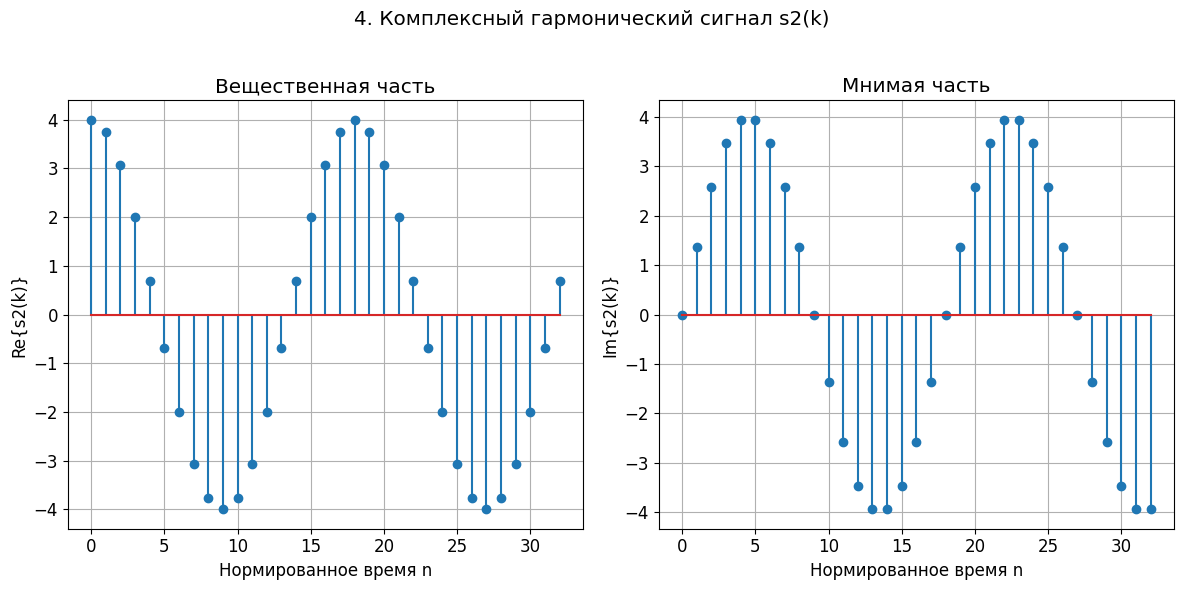

In [23]:
# --- 4. Дискретный комплексный гармонический сигнал ---
s2 = C * np.exp(1j * w0_hat * n)
s2_real = np.real(s2)
s2_imag = np.imag(s2)

fig4, (ax1, ax2) = plt.subplots(1, 2)
fig4.suptitle('4. Комплексный гармонический сигнал s2(k)')

# Вещественная часть
ax1.stem(n, s2_real)
ax1.set_xlabel('Нормированное время n')
ax1.set_ylabel('Re{s2(k)}')
ax1.set_title('Вещественная часть')
ax1.grid(True)

# Мнимая часть
ax2.stem(n, s2_imag)
ax2.set_xlabel('Нормированное время n')
ax2.set_ylabel('Im{s2(k)}')
ax2.set_title('Мнимая часть')
ax2.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('fig4_complex.png')
#plt.show()

*   Запись сигнала в виде комбинации двух вещественных последовательностей. Используя формулу Эйлера, сигнал можно представить в виде:
    $$
    s_2(k) = C e^{j \hat{\omega}_0 k} = C(\cos(\hat{\omega}_0 k) + j\sin(\hat{\omega}_0 k))
    $$
    Таким образом, сигнал $s_2(k)$ является комбинацией двух вещественных последовательностей:
*   Вещественная часть: $\text{Re}\{s_2(k)\} = C \cos(\hat{\omega}_0 k)$
*   Мнимая часть: $\text{Im}\{s_2(k)\} = C \sin(\hat{\omega}_0 k)$
    Это и отображено на графиках: вещественная часть представляет собой дискретную косинусоиду, а мнимая — дискретную синусоиду.

### 5. Задержанные последовательности

Смоделированы сигналы $\delta_d(k)$, $\sigma_d(k)$ и $s_1(k)$, задержанные на $m=8$ отсчетов.

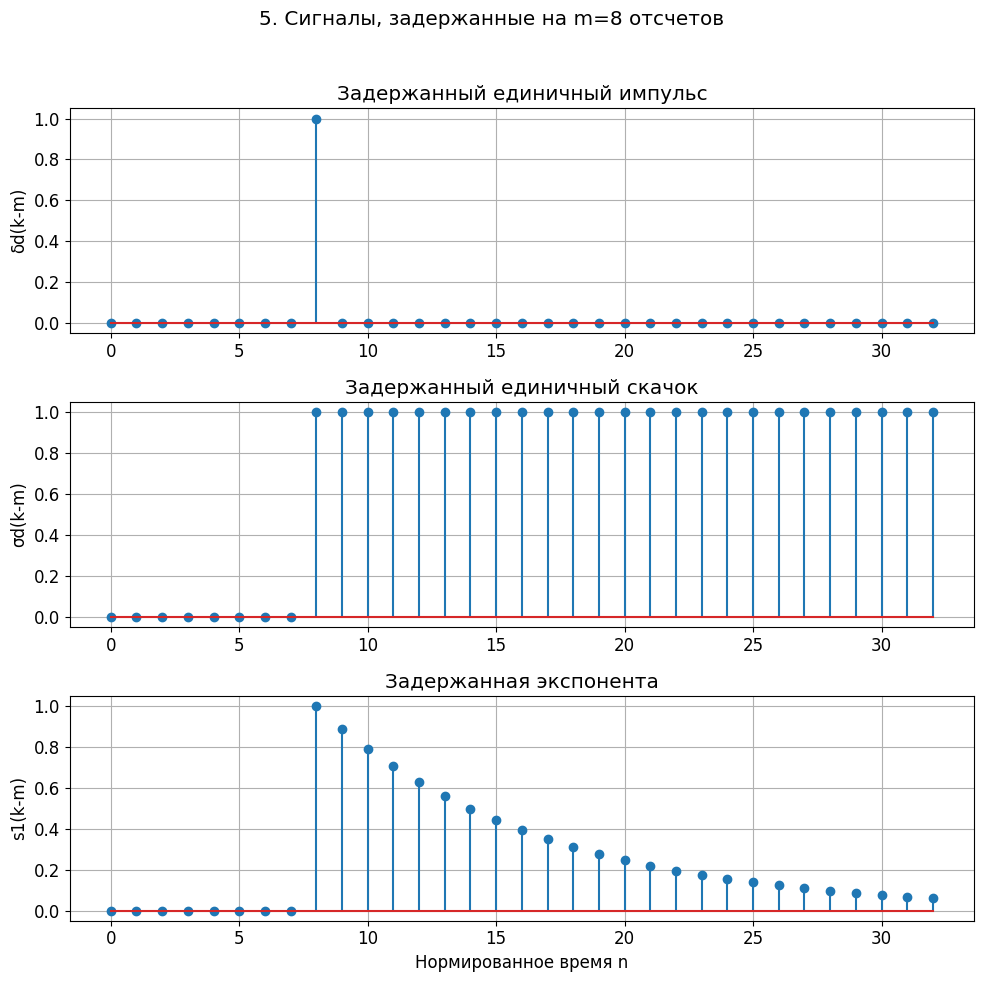

In [24]:
# --- 5. Задержанные последовательности ---
# Задержанный импульс
delta_d_delayed = np.zeros(N)
if m < N:
    delta_d_delayed[m] = 1

# Задержанный скачок
sigma_d_delayed = (n >= m).astype(int)

# Задержанная экспонента
s1_delayed = np.zeros(N)
# Вычисляем только для n >= m, чтобы избежать отрицательных степеней
non_zero_indices = n >= m
s1_delayed[non_zero_indices] = a**(n[non_zero_indices] - m)

fig5, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))
fig5.suptitle(f'5. Сигналы, задержанные на m={m} отсчетов')

# График задержанного импульса
ax1.stem(n, delta_d_delayed)
ax1.set_ylabel('δd(k-m)')
ax1.set_title('Задержанный единичный импульс')
ax1.grid(True)

# График задержанного скачка
ax2.stem(n, sigma_d_delayed)
ax2.set_ylabel('σd(k-m)')
ax2.set_title('Задержанный единичный скачок')
ax2.grid(True)

# График задержанной экспоненты
ax3.stem(n, s1_delayed)
ax3.set_xlabel('Нормированное время n')
ax3.set_ylabel('s1(k-m)')
ax3.set_title('Задержанная экспонента')
ax3.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('fig5_delayed.png')
#plt.show()

*   Формулы задержанных последовательностей. Операция задержки сигнала $s(k)$ на $m$ отсчетов эквивалентна замене аргумента $k$ на $k-m$.
*   Задержанный единичный импульс:
$$ \delta_d(k-m) = \begin{cases} 1, & k = m \\ 0, & k \neq m \end{cases} $$
*   Задержанный единичный скачок:
$$ \sigma_d(k-m) = \begin{cases} 1, & k \ge m \\ 0, & k < m \end{cases} $$
*   Задержанная экспоненциальная функция:
$$ s_{1, delayed}(k) = a^{k-m} \cdot \sigma_d(k-m) $$
(умножение на скачок $\sigma_d(k-m)$ математически обеспечивает нулевые значения при $k < m$)

Как видно из графиков на рисунке 5, все ключевые особенности сигналов (импульс, начало скачка, начало экспоненты) сместились из точки $n=0$ в точку $n=m=8$.

## Выводы

В ходе выполнения лабораторной работы были изучены математические модели стандартных дискретных сигналов. Было проведено их моделирование для заданных параметров. Были построены графики сигналов на шкале дискретного и дискретного нормированного времени.
Проанализированы ключевые свойства сигналов. Установлена связь между дискретным и непрерывным временем $(t = nT)$. Рассмотрено различие между дискретным импульсом Кронекера и непрерывной дельта-функцией Дирака. Изучено соответствие между аналоговыми и дискретными версиями единичного скачка и экспоненты. Комплексная экспонента была представлена в виде комбинации вещественной (косинусоидальной) и мнимой (синусоидальной) последовательностей. Продемонстрирована операция задержки сигнала на m отсчетов.